# Explore here

In [17]:
# Your code here
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.preprocessing import image
import shutil


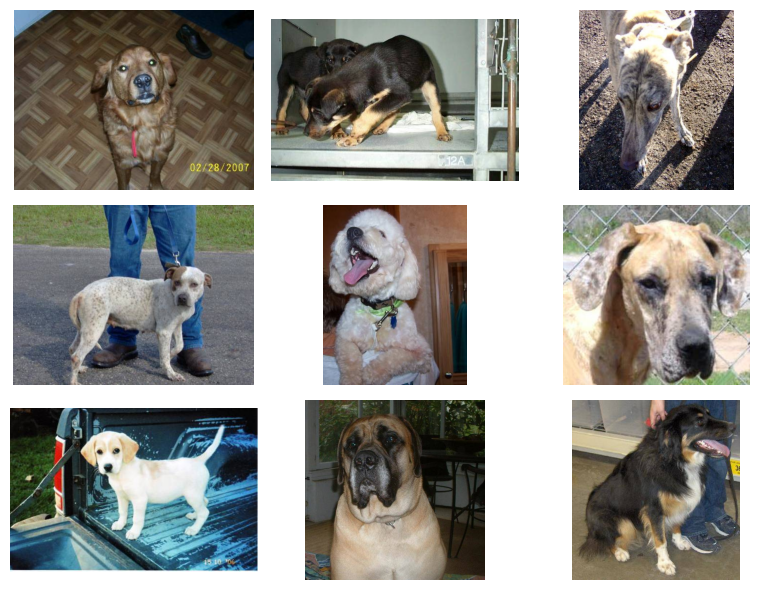

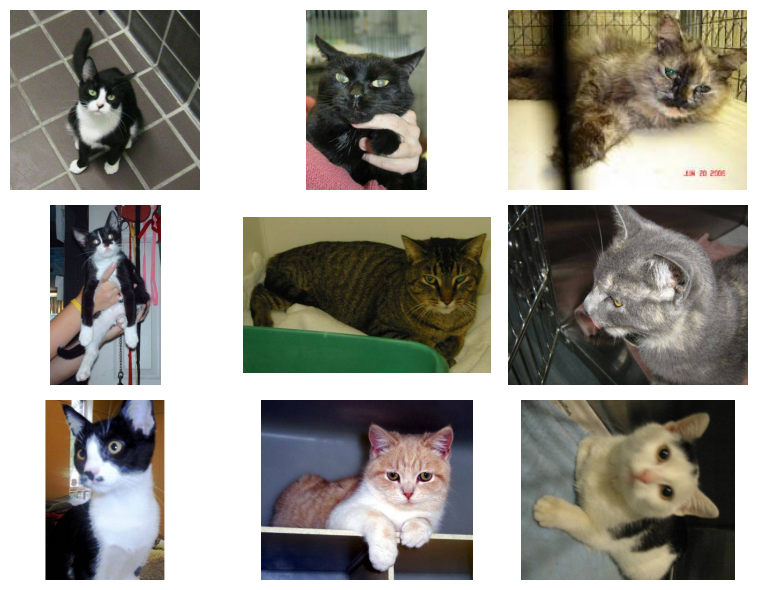

In [18]:
import os
from PIL import Image
import matplotlib.pyplot as plt

#Codigo que funciona para mostrar el contenido de ambas carpetas de train ###

# Ruta de la carpeta donde se encuentran las subcarpetas de perros y gatos 
base_path = '../data/raw/dogs-vs-cats/train' 

# Subcarpetas donde se encuentran las imágenes de perros y gatos
dog_folder = os.path.join(base_path, 'dogs')
cat_folder = os.path.join(base_path, 'cats')

# Listar las imágenes de perros y gatos
dog_images = os.listdir(dog_folder)
cat_images = os.listdir(cat_folder)

# Mostrar algunas imágenes de perros
plt.figure(figsize=(8, 6))
for i, dog_img in enumerate(dog_images[:9]):  # Mostrar las primeras 9 imágenes de perros
    dog_img_path = os.path.join(dog_folder, dog_img)
    img = Image.open(dog_img_path)
    plt.subplot(3, 3, i + 1)
    plt.imshow(img)
    plt.axis('off')
plt.tight_layout()
plt.show()

# Mostrar algunas imágenes de gatos
plt.figure(figsize=(8, 6))
for i, cat_img in enumerate(cat_images[:9]):  # Mostrar las primeras 9 imágenes de gatos
    cat_img_path = os.path.join(cat_folder, cat_img)
    img = Image.open(cat_img_path)
    plt.subplot(3, 3, i + 1)
    plt.imshow(img)
    plt.axis('off')
plt.tight_layout()
plt.show()


In [19]:

# # Ruta de la carpeta donde están todas las imágenes
# train_folder = '../data/raw/dogs-vs-cats/train'  # Asegúrate de poner la ruta correcta aquí

# # Crear las subcarpetas 'cats' y 'dogs' dentro de 'train' si no existen
# cats_folder = os.path.join(train_folder, 'cats')
# dogs_folder = os.path.join(train_folder, 'dogs')

# # Asegurarse de que las carpetas existan
# os.makedirs(cats_folder, exist_ok=True)
# os.makedirs(dogs_folder, exist_ok=True)

# # Mover las imágenes a las subcarpetas 'cats' y 'dogs' según el nombre del archivo
# for filename in os.listdir(train_folder):
#     file_path = os.path.join(train_folder, filename)

#     # Asegúrate de que solo mueves los archivos y no las carpetas
#     if os.path.isfile(file_path):  # Solo mover archivos, no carpetas
#         # Mover las imágenes que contienen 'cat' en el nombre a la carpeta 'cats'
#         if 'cat' in filename.lower():
#             shutil.move(file_path, os.path.join(cats_folder, filename))
#         # Mover las imágenes que contienen 'dog' en el nombre a la carpeta 'dogs'
#         elif 'dog' in filename.lower():
#             shutil.move(file_path, os.path.join(dogs_folder, filename))

# print("Las imágenes de 'train' han sido organizadas en subcarpetas 'cats' y 'dogs'.")


In [20]:
# import os

# test_dir = '/workspaces/Machine-Learning-Deep-Learning-JaironMark/data/raw/dogs-vs-cats/test1'

# if os.path.exists(test_dir):
#     print("La ruta existe.")
# else:
#     print("La ruta no existe.")


In [21]:
#from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define algunas reglas para DataGen
train_dir = "../data/raw/dogs-vs-cats/train"  # Ruta correcta al directorio de entrenamiento
test_dir = "../data/raw/dogs-vs-cats"  # Ruta al directorio de prueba (si existe)
image_size = (200, 200)

#Generador de datos para entrenamiento
datagentrain = ImageDataGenerator(rescale=1./255)  # Normalizar las imágenes a [0, 1]

#Generador de datos para prueba
datagentest = ImageDataGenerator(rescale=1./255)  # Normalizar las imágenes a [0, 1]

#Entrenamiento: Cargar imágenes desde el directorio de entrenamiento
train_data = datagentrain.flow_from_directory(
    train_dir,
    target_size=image_size,  # Redimensionar las imágenes a 200x200 píxeles
    batch_size=32,           # Tamaño del lote
    class_mode='categorical',     # En este caso, dos clases: 'dog' y 'cat'
    classes=["dogs", "cats"],  # Las carpetas de clases son 'dogs' y 'cats'
    shuffle=True             # Mezcla las imágenes aleatoriamente
)

# Prueba: Cargar imágenes desde el directorio de prueba
test_data = datagentest.flow_from_directory(
    test_dir,
    target_size=image_size,  # Redimensionar las imágenes a 200x200 píxeles
    batch_size=32,           # Tamaño del lote
    class_mode=None,     # En este caso, dos clases: 'dog' y 'cat'
    classes=["test1"],  # Las carpeta es test1
    shuffle=False            # No mezclar las imágenes de prueba
)

# datagentrain = ImageDataGenerator()
# datagentest = ImageDataGenerator()

# # Train Data Generation
# train_data = datagentrain.flow_from_directory(
#     train_dir,
#     target_size = image_size,
#     classes = ["dogs", "cats"] 
# )

# # Test Data Generation
# test_data = datagentest.flow_from_directory(
#     train_dir,
#     target_size = image_size,
#     classes = ["test1"] 
# )

# Ver el contenido de las clases cargadas
print("Clases en el conjunto de entrenamiento:", train_data.class_indices)
print("Clases en el conjunto de prueba:", test_data.class_indices)


Found 25000 images belonging to 2 classes.
Found 12500 images belonging to 1 classes.
Clases en el conjunto de entrenamiento: {'dogs': 0, 'cats': 1}
Clases en el conjunto de prueba: {'test1': 0}


In [22]:
# Move the Data Through the Neural Network
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten

model = Sequential()
model.add(Conv2D(input_shape = (224,224,3), filters = 64, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 64,kernel_size = (3,3),padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))

# Move the Data through the Dense Layers
model.add(Flatten())
model.add(Dense(units = 4096,activation = "relu"))
model.add(Dense(units = 4096,activation = "relu"))
model.add(Dense(units = 2, activation = "softmax"))

In [23]:
# Compile the Model using Adam 
from keras.optimizers import Adam

# Compile the Model before Training
model.compile(loss = keras.losses.categorical_crossentropy, optimizer = Adam(learning_rate = 0.001), metrics = ["accuracy"])


In [ ]:

# Train the Model
model.fit(train_data, epochs = 1)

ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense_6" is incompatible with the layer: expected axis -1 of input shape to have value 25088, but received input with shape (None, 18432)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 200, 200, 3), dtype=float32)
  • training=True
  • mask=None

: 